# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [543]:
# Write your code here
df.shape
print("The number of rows in given dataset =",df.shape[0],"and number of columns=",df.shape[1])

The number of rows in given dataset = 1898 and number of columns= 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [61]:
# Use info() to print a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [891]:
# Write your code here
# Rating column has missing values been denoted as 'Not given '.Replacing it to NaN as there are almost 736 rows with Not given value.
#df['rating'] = df['rating'].astype('float')
df.replace("Not given", np.nan,inplace = True)
df.isna().sum()


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
Revenue                    0
commission                 0
total_time                 0
dtype: int64

In [897]:
df['rating'] = df['rating'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   Revenue                1898 non-null   float64
 10  commission             1898 non-null   float64
 11  total_time             1898 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 178.1+ KB


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [378]:
# Write your code here
#Using .describe function to gather stastical summary of data . 
stastical_summary_of_food_prep = df['food_preparation_time'].describe()
#Extracting min,mean and max values from the result of describe function 
min=stastical_summary_of_food_prep['min']
avg=stastical_summary_of_food_prep['mean']
max=stastical_summary_of_food_prep['max']
print('The min,mean and max time taken for food to prepare is : ',min,',',avg,',',max)

The min,mean and max time taken for food to prepare is :  20.0 , 27.371970495258168 , 35.0


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [386]:
# Write the code here
#Using.isna() function to check the nan values in rating column ,using sum()function to sum all those values 
Orders_notrated = df['rating'].isna().sum()
print("There are",Orders_notrated,"not rated orders")

There are 736 not rated orders


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order_ID

In [899]:
# Write the code here
unique_order_id= df['order_id'].nunique()
print("There are",unique_order_id,"unique order ids in the given dataframe")

There are 1898 unique order ids in the given dataframe


#### Customer ID

In [396]:
unique_customer_id= df['customer_id'].nunique()
print("There are",unique_customer_id,"unique customer ids in the given dataframe")

There are 1200 unique customer ids in the given dataframe


#### Restaurant Names

In [399]:
unique_restaurant_name= df['restaurant_name'].nunique()
print("There are",unique_restaurant_name,"unique restaurant names in the given dataframe")

There are 178 unique restaurant names in the given dataframe


#### Cuisine Type 

In [402]:
#checking unique cuisine types available in data
unique_cuisine_type= df['cuisine_type'].nunique()
print("There are",unique_cuisine_type,"unique cuisine types in the given dataframe")

There are 14 unique cuisine types in the given dataframe


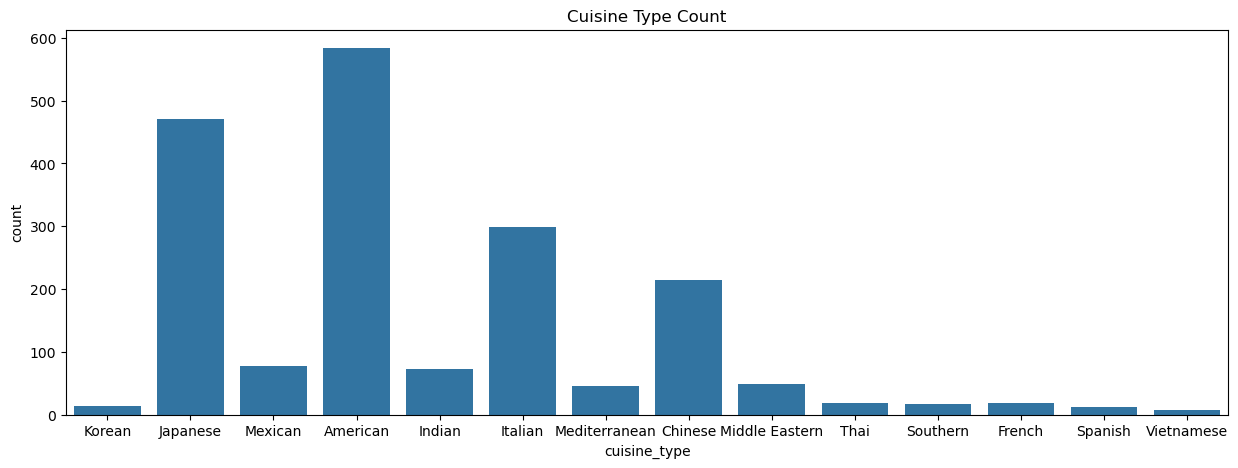

In [410]:
#Plotting count plot to visualize the cuisine type to gather insights 
plt.figure(figsize = (15,5))
sns.countplot(x='cuisine_type',data=df)
plt.title('Cuisine Type Count')
plt.show()
#Observation : American is the most popular cuisine type and Vietnamese is the least popular among all .

#### Cost Of Order

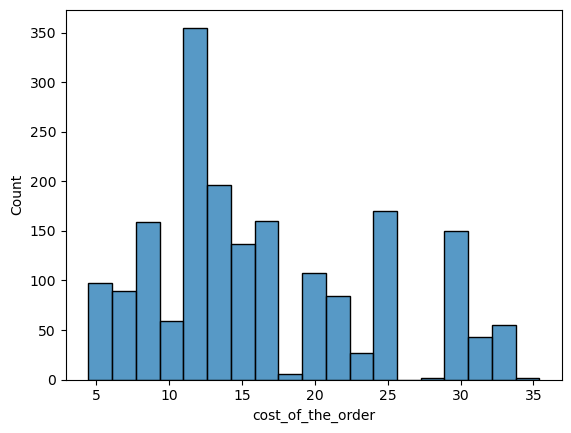

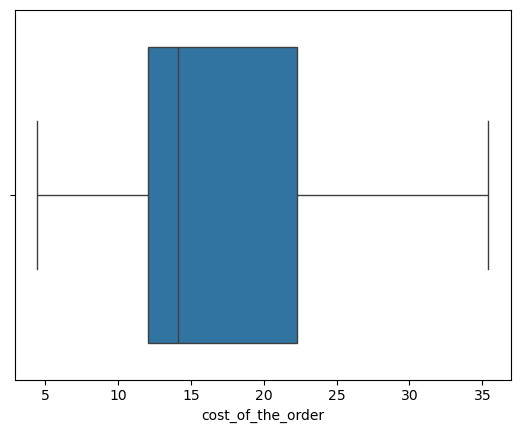

In [419]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 
#Observation : The histogram shows that most of the orders are around $12 to $22 and the plot is rightly skewed which infers that there are less number of orders having high costs.
#box plot shows that median is somewhere near to $14 and there are few orders which are raising the max little higher to #35 dollars 

#### Day of the week

In [426]:
df['day_of_the_week'].nunique()

2

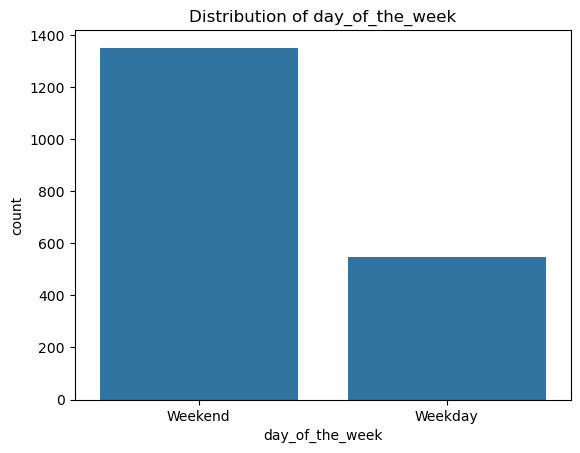

In [428]:
sns.countplot(data=df,x='day_of_the_week')
plt.title("Distribution of day_of_the_week")
plt.show()
#Observation : Most of the orders are placed during weekend and comparitively less number of orders in weekdays.

#### Rating

In [447]:
df["rating"].nunique()
#Observation : There are only three values present in the rating column of dataframe  

3

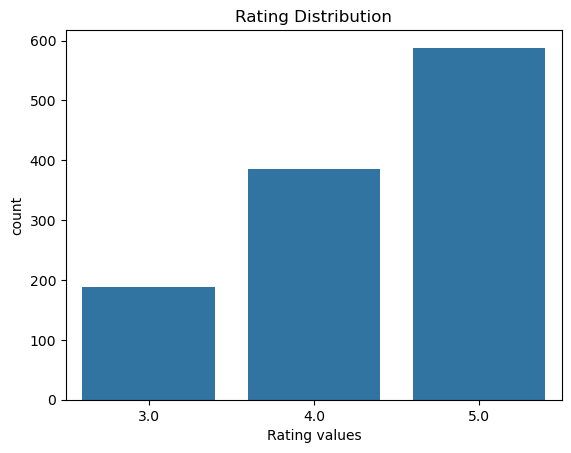

In [457]:
sns.countplot(data=df,x='rating')
plt.title('Rating Distribution')
plt.xlabel("Rating values")
plt.show()
#Observation : Orders are devided in 3 ratings 3/4/5 .The maximum orders have 5 rating .

In [467]:
df.loc[df['rating']== 5]
#Observation: There are almost 588 orders where order rating is 5 .386 orders with rating 4.188 orders with rating 3 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5.0,23,22
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17
...,...,...,...,...,...,...,...,...,...
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5.0,21,26
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19


#### Food Preparation Time 

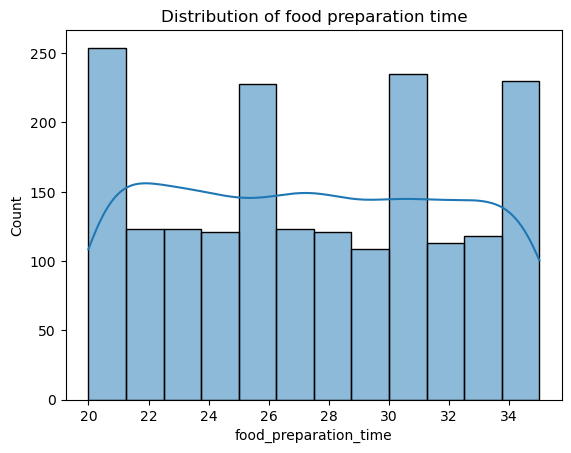

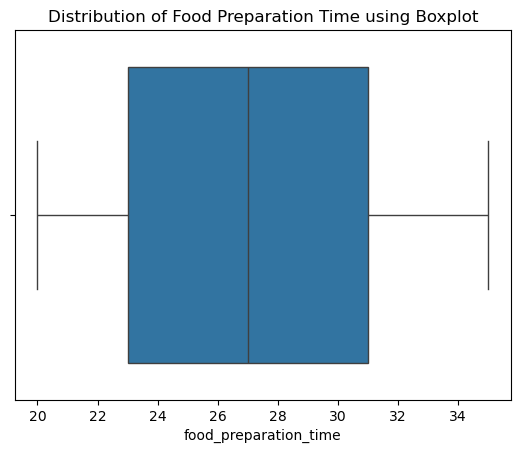

In [484]:
sns.histplot(data=df,x="food_preparation_time",kde=True)
plt.title("Distribution of food preparation time")
plt.show()

sns.boxplot(data=df,x = "food_preparation_time")
plt.title('Distribution of Food Preparation Time using Boxplot')
plt.show()

#Observation : The food preparation time looks fairly evenly distributed across 20-35 range . 
#Most of the orders take around 20 mins of time.
#having peaks at 20,25,30,34 represent that certain restaurant or type of orders tend to remain in these ranges more frequently .  
#Median is approximately 27 mins .


#### Delivery Time

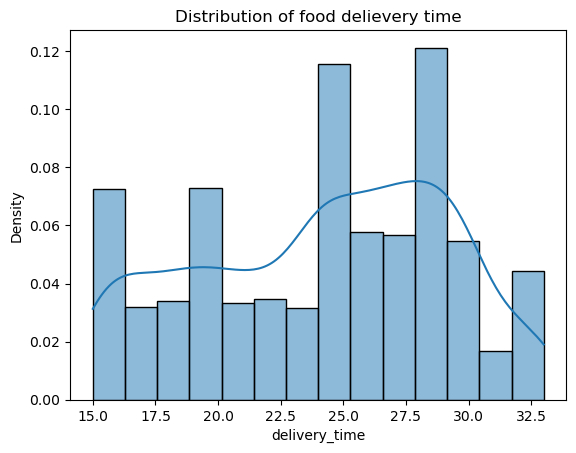

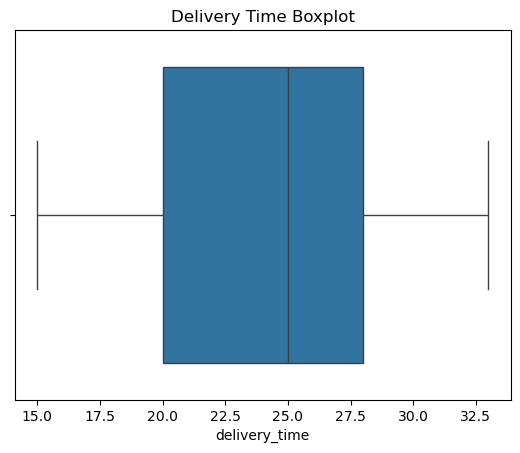

In [198]:
sns.histplot(df['delivery_time'], kde=True,stat="density")
plt.title("Distribution of food delievery time")
plt.show()
sns.boxplot(x=df['delivery_time'])
plt.title('Delivery Time Boxplot')
plt.show()
#Observation : Same as preparation time delievery time also have few peaks and most of the orders are delievered within 25 to 30 minutes .

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

Top 5 restaurants are : restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


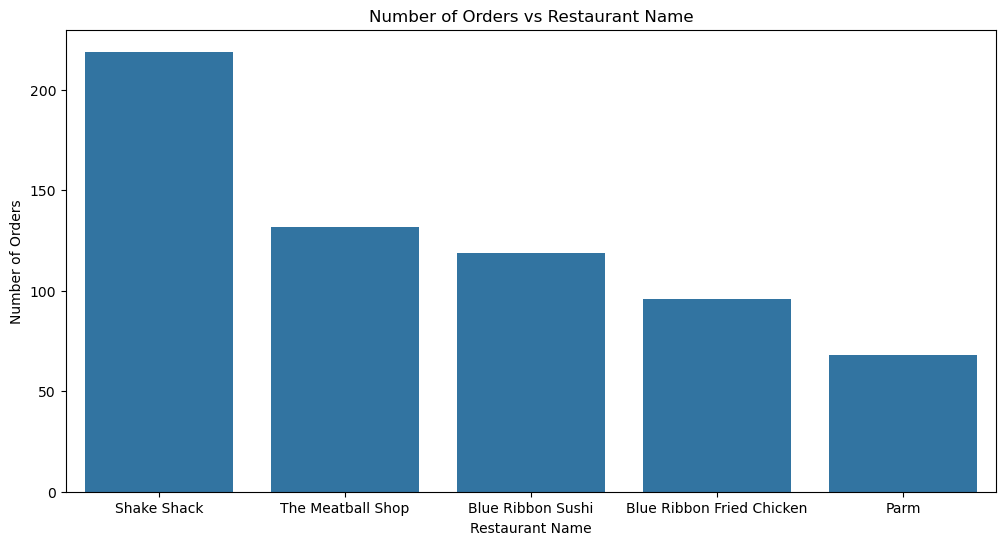

In [834]:
# Write the code here
top5_restaurant = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants are :",top5_restaurant)
plt.figure(figsize=(12, 6))
sns.barplot(y=top5_restaurant.values, x=top5_restaurant.index)
plt.title('Number of Orders vs Restaurant Name')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

Most Popular Cuisines on weekends is American


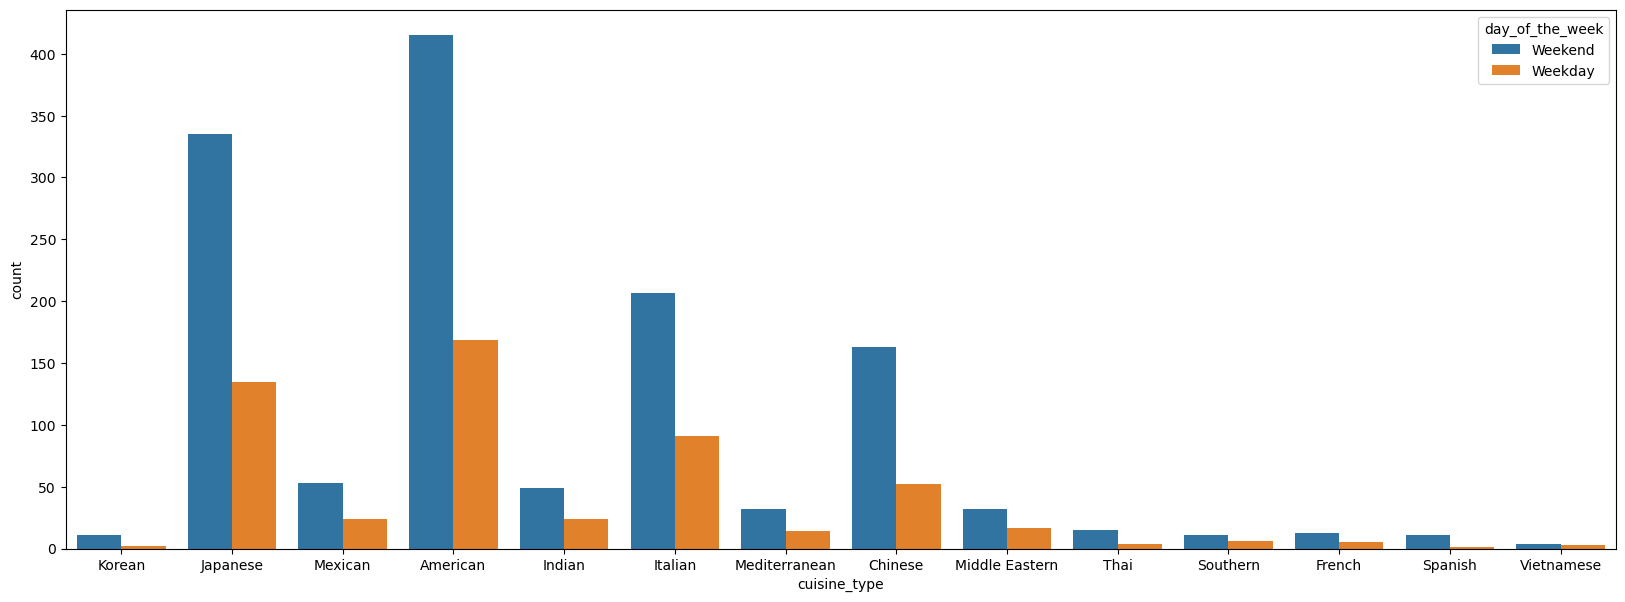

In [519]:
# Write the code here
#Lets understand through plot 
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
#through code 
new_df = df[df['day_of_the_week'] == 'Weekend']
most_popular=new_df['cuisine_type'].value_counts()
print("Most Popular Cuisines on weekends is", most_popular.index[0])


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

Percentage of orders above 20 dollars: 29.24 %


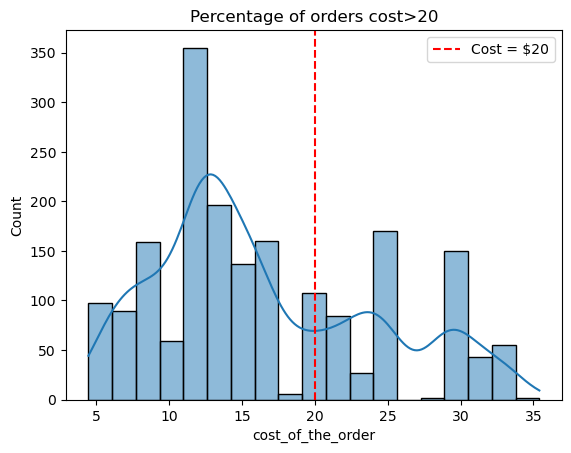

In [521]:
# Write the code here
total_number_of_orders = len(df)
orders_above_20_dollars = len(df[df['cost_of_the_order'] > 20])
below_equal_20 = len(df[df['cost_of_the_order'] <= 20])
percentage_of_orders_above_20 = (orders_above_20_dollars / total_number_of_orders) * 100
print("Percentage of orders above 20 dollars:", round(percentage_of_orders_above_20, 2), '%')

sns.histplot(data=df, x="cost_of_the_order", kde=True)
plt.title("Percentage of orders cost>20")
plt.axvline(x= 20, color='red', linestyle='--', label='Cost = $20')  # Line at $20 for reference
plt.legend()
plt.show()
#percentage_of_orders_above_20 will give exact percentage of orders which cost more than 20 dollars 
#Plot below shows the curve to the right side of the dashed line refers to order which cost more than 20 dollars 

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

The mean delivery time for dataset is 24.16 minutes


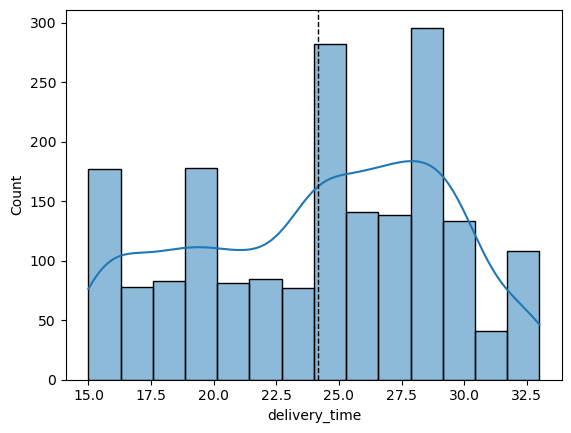

In [523]:
# Write the code here
mean_time= df['delivery_time'].mean()
print('The mean delivery time for dataset is', round(mean_time, 2), 'minutes')
sns.histplot(df['delivery_time'], kde=True)
plt.axvline(df['delivery_time'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


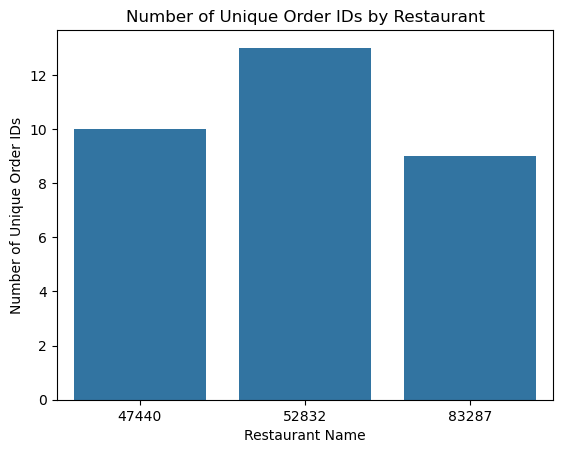

In [537]:
# Write the code here
top3_restuarant_name=df['customer_id'].value_counts().head(3)
print(top3_restuarant_name)
#plt.figure(figsize=(6, 5))
sns.barplot(y=top3_restuarant_name.values, x=top3_restuarant_name.index)
plt.title('Number of Unique Order IDs by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Unique Order IDs')
plt.show()


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

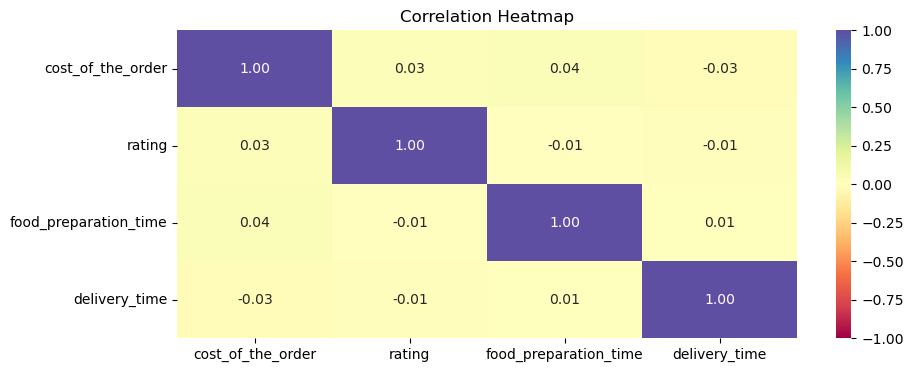

In [585]:
# Write the code here
#Plotting heat map 
import matplotlib.pyplot as plt
columns = ['cost_of_the_order','rating','food_preparation_time','delivery_time']
plt.figure(figsize=(10, 4))
sns.heatmap(df[columns].corr(),annot=True,cmap="Spectral",vmin=-1,vmax=1,fmt=".2f")
plt.xticks(rotation=0)
plt.show
plt.title("Correlation Heatmap")
#Observation : Cost of order and rating are positively correlatd,rating is inversely proportional to food preptime ,rating and delievery time is also inversely proportional

#### Cost of Order VS Food Preparation Time 

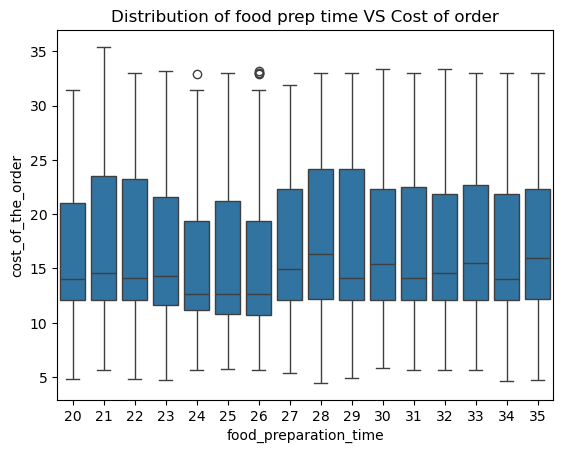

In [836]:
sns.boxplot(data=df,x="food_preparation_time",y="cost_of_the_order")
plt.title("Distribution of food prep time VS Cost of order")
plt.show()
#Observation : cost of order increases with food prep time but it is also showing few dips at food prep time 24 and 26 which looks like outliers .

#### Cuisine Type VS Rating

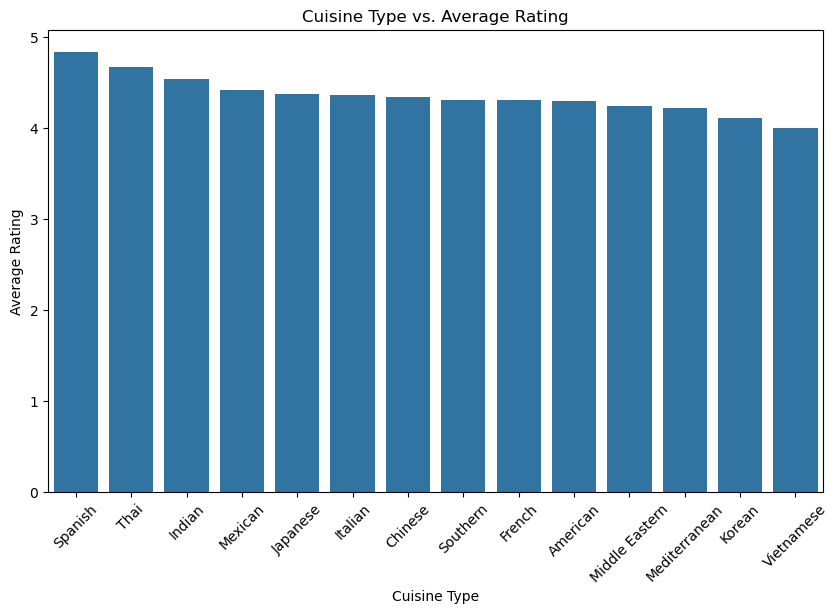

In [885]:
avg_rating_by_cuisine = df.groupby('cuisine_type')['rating'].mean().reset_index()

# Sort the values by average rating
avg_rating_by_cuisine = avg_rating_by_cuisine.sort_values(by='rating', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_cuisine, x='cuisine_type', y='rating')
plt.title('Cuisine Type vs. Average Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

#### Cost of order VS rating

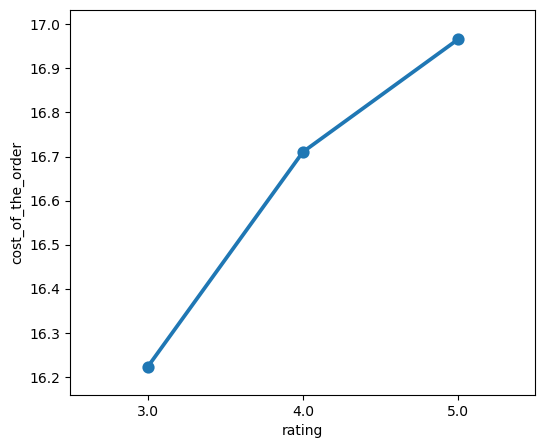

In [844]:
#Plotting point plot to show relationship between Cost of order and  rating
plt.figure(figsize=(6, 5))
sns.pointplot(data=df,x="rating",y="cost_of_the_order",errorbar=('ci', False))   
plt.show()

#### Rating VS Food Preparation Time 

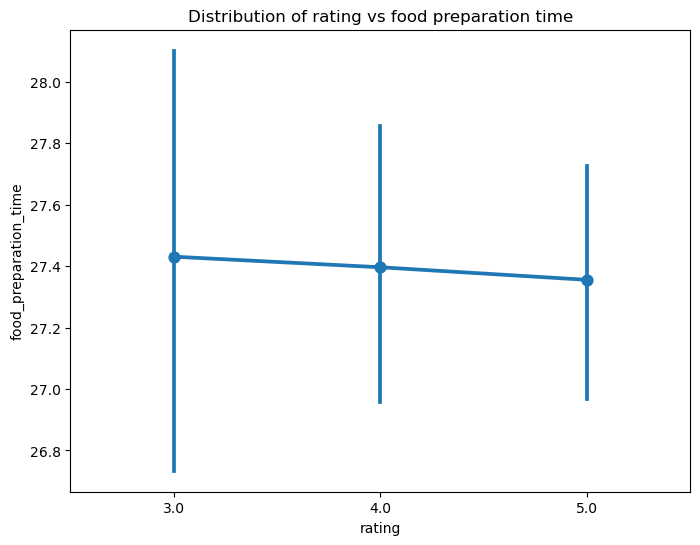

In [655]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df,x="rating",y="food_preparation_time")
plt.title("Distribution of rating vs food preparation time")
plt.show()
#Observation :Food preparation time and rating are inversely proportional . As food preparation time increases rating is reduced . 

#### Rating VS delievery time

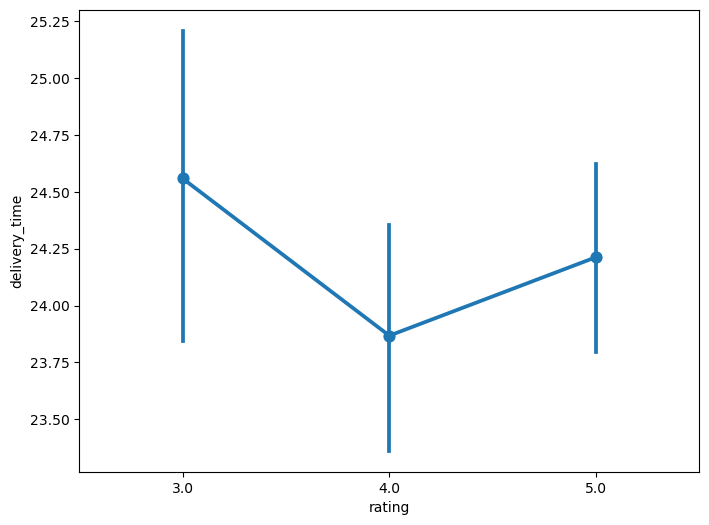

In [666]:
# Relationship between rating and delivery time
plt.figure(figsize=(8, 6))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()
#Observation : Same as preparation time ,as delievery time increases rating is getting decreased for rating 3 .Although we see a dip in 4 and 5 rating 

#### Days of week VS delievery Time 

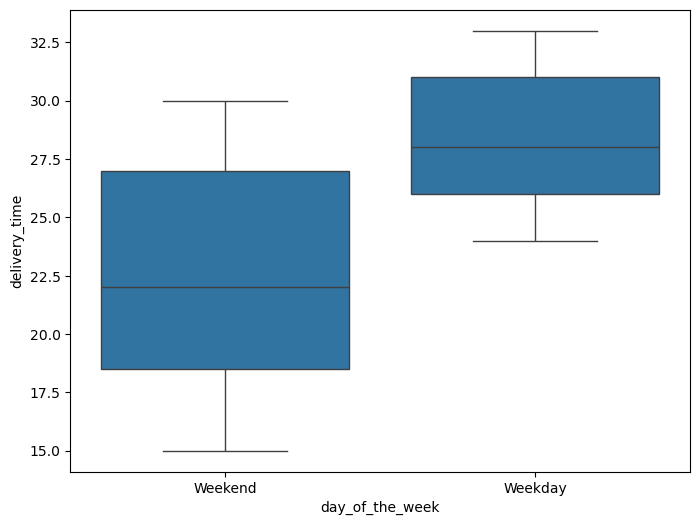

In [688]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x = 'day_of_the_week',y="delivery_time")
plt.show()
#Observation:Delievery time increases on weekdays as compared to weekend

#### Cuisine Type VS Cost Of Order 

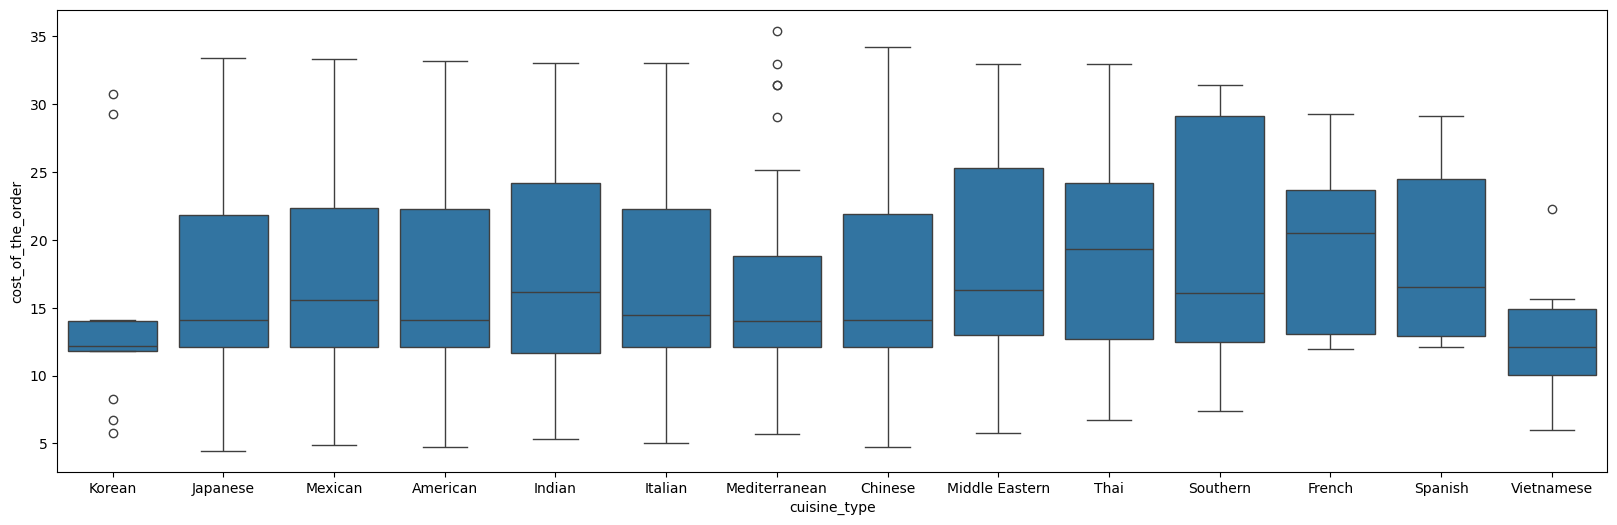

In [883]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df,x="cuisine_type",y="cost_of_the_order")
plt.show()

#### Cuisine Type VS Food Preparation Time 

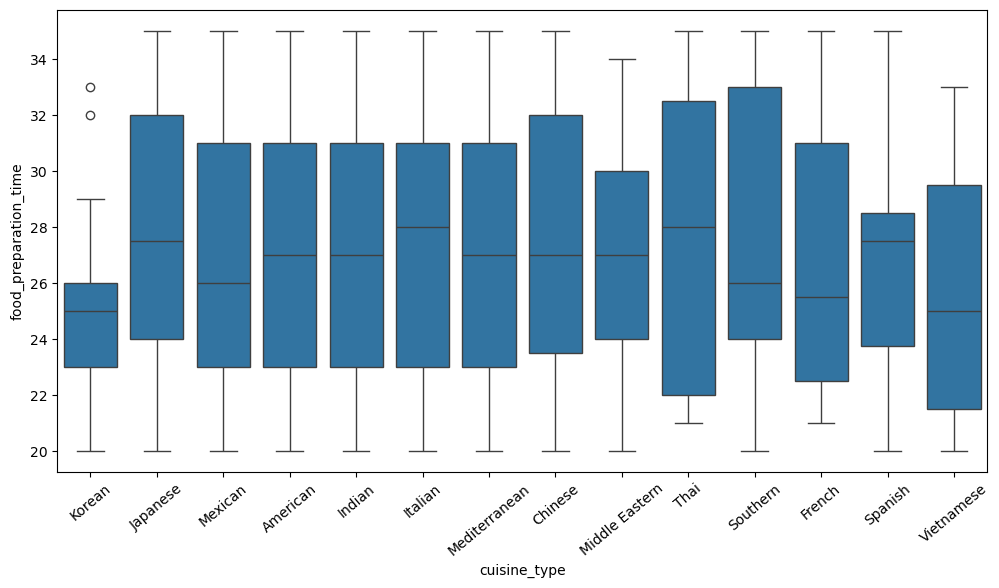

In [726]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x="cuisine_type",y="food_preparation_time")
plt.xticks(rotation = 40)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [777]:
# Write the code here
#Grouping restaurant name and applying  mean and count on rating 
res_rating = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
res_rating

#Applying condition of order count more than 50 and average rating greater than 4

promotional_offer = res_rating[(res_rating['count'] > 50) & (res_rating['mean'] > 4)]
promotional_offer



,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [785]:
# Write the code here
# Function to determine the revenue
def commision(x):
    if x>20 :
       return x*0.25
    elif x>5 :
        return x*0.15
    else:
        return 0
df['Revenue'] = df['cost_of_the_order'].apply(commision)
df.head()
#Getting the total revenue and printing it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [846]:
# Write the code here
# Calculating total delivery time and adding a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Percentage of orders that have more than 60 minutes of total delivery time 
df_greater_than_60 = df[df['total_time']>60] 

# Calculating the number of total orders where the cost is above 60 dollars
print('The number of total orders that cost above 60 dollars is:', df_greater_than_60.shape[0])

# Calculating percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 60 minutes:", round(percentage, 2), '%')

The number of total orders that cost above 60 dollars is: 200
Percentage of orders above 60 minutes: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


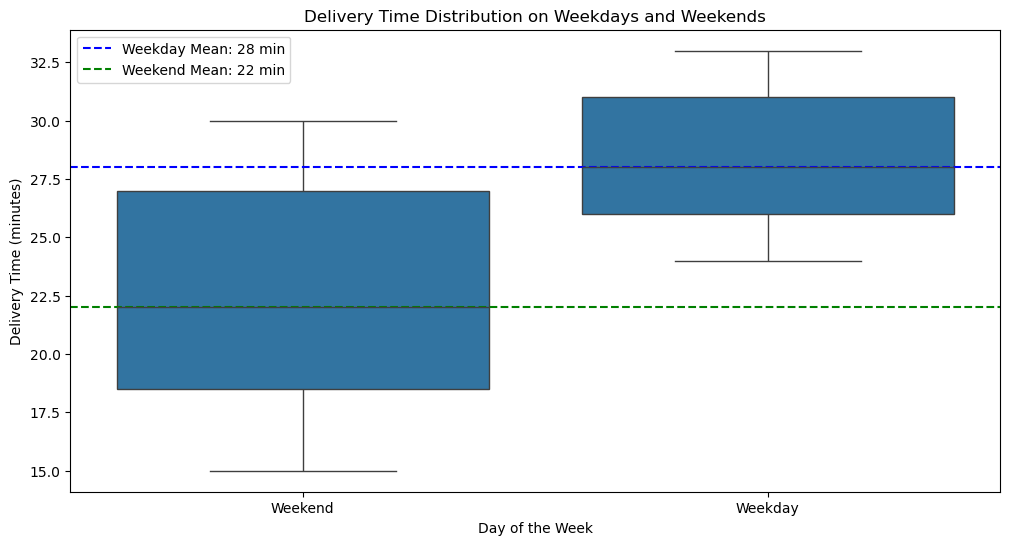

In [831]:
# Write the code here
mean_weekdays=round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print('The mean delivery time on weekdays is around', 
     mean_weekdays,
     'minutes')

mean_weekends=round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print('The mean delivery time on weekends is around', 
      mean_weekends,
     'minutes')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x="day_of_the_week",y="delivery_time")

plt.axhline(mean_weekdays, color='blue', linestyle='--', label=f'Weekday Mean: {mean_weekdays} min')
plt.axhline(mean_weekends, color='green', linestyle='--', label=f'Weekend Mean: {mean_weekends} min')

plt.title('Delivery Time Distribution on Weekdays and Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.legend()
plt.show()

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Cuisines, such as American and Japanese, likely have high average ratings. This suggests that customers are generally satisfied with these cuisines, indicating not just preference for the food type but also successful branding and marketing by those restaurants as these cuisines are consistently receiving high rating .
* * Cuisine type Mediterranean's cost is on the lesser side ,we can see some outliers showing few orders are having high price .The same goes for Korean as well . These two cuisine types are also not having much of sale .
*  As food preparation time increases rating is reduce,same goes for s delievery ti which indicates that customer prefer shorter preparation and delievery time.
* Most of the orders are around $12 to $22 with few cost ranges to $35,mostly for Mediterranean cuisine types . . 

*  While food preparation times remain mostly consistent, delivery times vary, hinting at potential inefficiencies in the delivery process, perhaps due to logistical issues or delays at certain restaurants.
*  Customers tend to spend more on weekends, likely due to larger family or group orders, and higher-value meals tend to come from specific cuisines or well-known restaurants.
*  A few outliers indicate that some restaurants take significantly longer to prepare and deliver food. This inconsistency might be negatively impacting customer experience for those orders, reflected in some of the lower rati
*  Most of the orders are placed during weekend and comparitively less number of orders in weekdays.Which shows customers might be ordering food on weekends when they meet their friends or family .
* ngs.
*  The company's primary source of revenue comes from orders over $20, where a 25% commission is applied. However, there’s a significant portion of orders priced below $20, reducing potential commission-based earnings.
*  

### Recommendations:

*  A substantial number of orders are not rated, which could be a sign of disengaged customers, or the feedback system might not be as intuitive or rewarding for users..Encourage customers to rate their orders by offering small incentives such as discounts or reward points for   providing feedback.
*  More ratings will help refine the quality of services offered.
*  There are almost 10.54 % orders taking more than 60 minutes to deliever ,which can be looked upon and corrected .
*  Promote restaurants with high ratings (over 4 stars) more prominently on the platform, as they are more likely to retain customers and attract new ones. Focus marketing efforts on promoting American, Japanese, and Korean cuisines, as these are the most popular.
*  Partner with highly-rated restaurants to introduce special deals, discounts, or loyalty programs to maintain customer engagement.
*  Collaborate with restaurants that frequently have delayed orders to understand where bottlenecks occur. Restaurants with longer delivery or preparation times could benefit from operational training or improved staffing models during peak hours.
*  Since orders over $20 contribute significantly to revenue (with a 25% commission),encoraging customers to spend more by offering bundled deals or discounts on orders exceeding a certain value will help . 

---